In [21]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

TEST_IMAGE_PATH = "../data/test10.jpg"
TEST_IMAGE = cv2.imread(TEST_IMAGE_PATH)
TEST_IMAGE = cv2.cvtColor(TEST_IMAGE, cv2.COLOR_BGR2RGB)

# Load Test iamges

In [22]:
print(f"""Image path: {TEST_IMAGE_PATH}
Image shape: {TEST_IMAGE.shape}""")

Image path: ../data/test10.jpg
Image shape: (811, 564, 3)


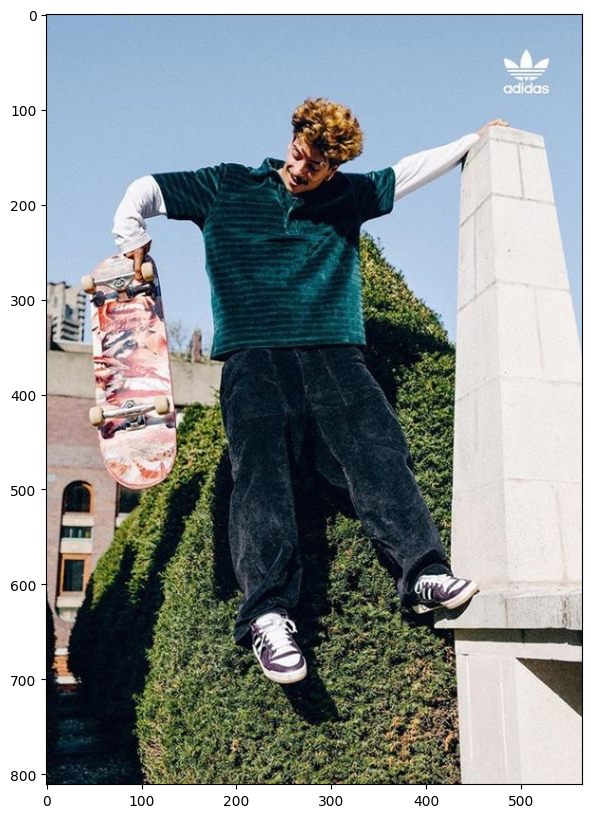

In [23]:
plt.figure(figsize=(10, 10))
plt.imshow(TEST_IMAGE)
plt.show()

# Model Initalize

In [24]:
from torchvision.transforms import transforms
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch
import utils
import time
import cv2

In [25]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

In [26]:
model = torchvision.models.detection.keypointrcnn_resnet50_fpn(pretrained=True, num_keypoints=17,)
device = torch.device('cpu')
model.to(device).eval()

KeypointRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(640, 672, 704, 736, 768, 800), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.

In [27]:
orig_image = TEST_IMAGE.copy()
orig_image = np.array(orig_image, dtype=np.float32) / 255.0

In [28]:
test_image = transform(TEST_IMAGE)
test_image = test_image.unsqueeze(0).to(device)

In [29]:
os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '0'

In [30]:
start_time = time.time()
with torch.no_grad():
    predictions = model(test_image)
print("Time taken: {:.2f} seconds".format(time.time() - start_time))

print(predictions)

Time taken: 1.38 seconds
[{'boxes': tensor([[5.7341e+01, 7.6995e+01, 4.9627e+02, 7.2386e+02],
        [1.5726e+02, 2.7319e+02, 4.5994e+02, 7.2288e+02],
        [9.2030e+01, 2.5952e+02, 1.1972e+02, 2.9719e+02],
        [8.1721e+01, 2.4707e+02, 1.1818e+02, 2.9160e+02],
        [8.9873e+01, 2.5138e+02, 1.2291e+02, 3.1983e+02],
        [2.0586e-03, 6.1350e+02, 1.3917e+01, 7.2845e+02]]), 'labels': tensor([1, 1, 1, 1, 1, 1]), 'scores': tensor([0.9999, 0.3904, 0.1979, 0.1970, 0.0878, 0.0738]), 'keypoints': tensor([[[2.6657e+02, 1.6191e+02, 1.0000e+00],
         [2.8422e+02, 1.5768e+02, 1.0000e+00],
         [2.6093e+02, 1.4711e+02, 1.0000e+00],
         [3.0609e+02, 1.5909e+02, 1.0000e+00],
         [2.5246e+02, 1.3301e+02, 1.0000e+00],
         [3.2303e+02, 1.8798e+02, 1.0000e+00],
         [1.9107e+02, 1.8093e+02, 1.0000e+00],
         [3.7948e+02, 1.6684e+02, 1.0000e+00],
         [1.0427e+02, 1.8164e+02, 1.0000e+00],
         [4.4864e+02, 1.3301e+02, 1.0000e+00],
         [9.2272e+01, 2.4

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Time taken: 1.37 seconds


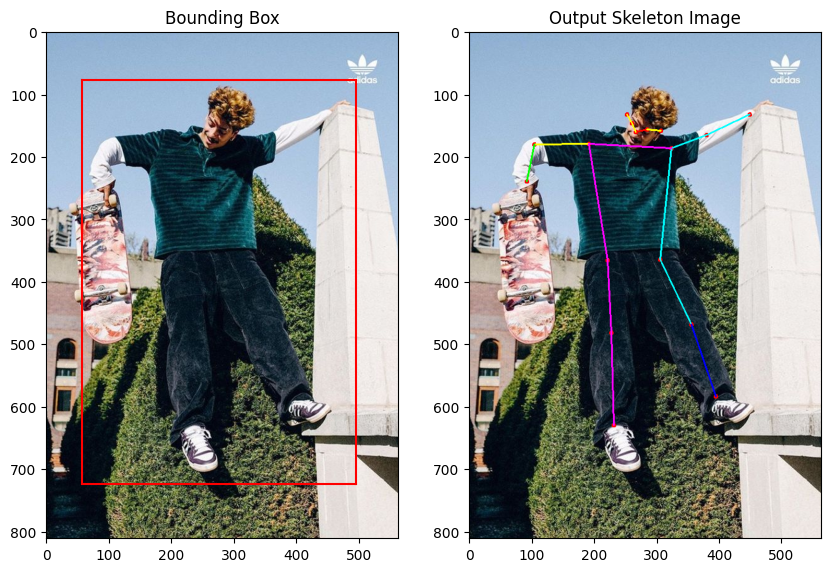

In [31]:
boxes = predictions[0]['boxes'].cpu().numpy().astype(np.int32)

start_time = time.time()
with torch.no_grad():
    predictions = model(test_image)
print("Time taken: {:.2f} seconds".format(time.time() - start_time))

output_image = utils.draw_keypoints(predictions, orig_image)

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.title('Bounding Box')
plt.imshow(TEST_IMAGE)
plt.plot([boxes[0][0], boxes[0][2]], [boxes[0][1], boxes[0][1]], color='red')
plt.plot([boxes[0][0], boxes[0][2]], [boxes[0][3], boxes[0][3]], color='red')
plt.plot([boxes[0][0], boxes[0][0]], [boxes[0][1], boxes[0][3]], color='red')
plt.plot([boxes[0][2], boxes[0][2]], [boxes[0][1], boxes[0][3]], color='red')

plt.subplot(1, 2, 2)
plt.title('Output Skeleton Image')
plt.imshow(output_image)

plt.show()